Let's play with the Kaggle Titanic data set and Keras

In [490]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils

import csv
import re
from sklearn import preprocessing
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [529]:
row_num = 0
training_data = []

# import training data
with open('./data/train.csv', 'r') as train_data:
    for line in csv.reader(train_data, delimiter=','):
        if row_num > 0:
            training_data.append(line)

        row_num += 1

train_data.close()

print(training_data[0])

['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S']


In [315]:
age_data = []
row_idx = 0

for person_data in training_data:
    if(person_data[5] == ''):
        age_data.append(0.)
    else:
        age_data.append(float(person_data[5]))
    row_idx = row_idx + 1
    
#normaliser = preprocessing.Normalizer().fit(classes)
#classes_normalised = normaliser.transform(classes)
#classes_scaled = preprocessing.scale(classes)


#plt.hist(classes)
#plt.show()

#fig, ax = plt.subplots(1, 2)
#sns.distplot(classes, ax = ax[0])
#ax[0].set_title('Class Data - Original')
#sns.distplot(classes_normalised, ax = ax[1])
#ax[1].set_title('Class Data - Normalise')
#sns.distplot(classes_scaled, ax = ax[1])
#ax[1].set_title('Class Data - Scaled')

#plt.show()

In [550]:
#pre-process training data
x_train = []
y_train = []

def FloatOrZero(value):
    try:
        return float(value)
    except:
        return 0.0

def preprocess_data(all_data, is_test_data = 0):
    
    x_train = np.empty((len(all_data), 5))
    y_train = np.empty((len(all_data), 1))
    
    class_encoder = preprocessing.LabelEncoder()
    class_encoder.fit(['1', '2', '3'])
    
    gender_encoder = preprocessing.LabelEncoder()
    gender_encoder.fit(['male', 'female'])

    age_scaler = preprocessing.MinMaxScaler()
    age_scaler.fit([-1., 100.])
    
    sibling_parch_scaler = preprocessing.MinMaxScaler()
    sibling_parch_scaler.fit([0., 10.])
    
    all_data = np.array(all_data)    
    
    if(is_test_data == 0):
        np.random.shuffle(all_data)
    
    age_data = map(FloatOrZero, all_data[:, 5])
    all_data[:, 5] = np.array(list(age_data))
    all_data[:, 6] = all_data[:, 6].astype(np.float)
    all_data[:, 7] = all_data[:, 7].astype(np.float)
    
    x_train[:, 0] = class_encoder.transform(all_data[:, 2])
    x_train[:, 1] = gender_encoder.transform(all_data[:, 4])
    x_train[:, 2] = age_scaler.transform(all_data[:, 5])
    x_train[:, 3] = sibling_parch_scaler.transform(all_data[:, 6])
    x_train[:, 4] = sibling_parch_scaler.transform(all_data[:, 7])
    
    if(is_test_data == 0):
        y_train = all_data[:, 1]
        
    return x_train, y_train

x_train, y_train = preprocess_data(training_data)
print(x_train[0])

[ 0.          0.          0.40594059  0.          0.        ]


C:\MiniConda\envs\dlnd\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\MiniConda\envs\dlnd\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\MiniConda\envs\dlnd\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature o

In [611]:
model = Sequential()
model.add(Dense(32, input_dim = len(x_train[0]), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [612]:
adam = Adam(lr=0.0003, decay=0.00000001)

model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [613]:
history = model.fit(x_train, np.array(y_train), validation_split = 0.15, epochs = 150, batch_size = 32, verbose = 2)

Train on 757 samples, validate on 134 samples
Epoch 1/150
 - 8s - loss: 0.6549 - acc: 0.6196 - val_loss: 0.6322 - val_acc: 0.6940
Epoch 2/150
 - 0s - loss: 0.6172 - acc: 0.6803 - val_loss: 0.5939 - val_acc: 0.7388
Epoch 3/150
 - 0s - loss: 0.6021 - acc: 0.7081 - val_loss: 0.5631 - val_acc: 0.7388
Epoch 4/150
 - 0s - loss: 0.5556 - acc: 0.7345 - val_loss: 0.5435 - val_acc: 0.7388
Epoch 5/150
 - 0s - loss: 0.5418 - acc: 0.7609 - val_loss: 0.5275 - val_acc: 0.7239
Epoch 6/150
 - 0s - loss: 0.5274 - acc: 0.7490 - val_loss: 0.5149 - val_acc: 0.7761
Epoch 7/150
 - 0s - loss: 0.5099 - acc: 0.7635 - val_loss: 0.5065 - val_acc: 0.7836
Epoch 8/150
 - 0s - loss: 0.5107 - acc: 0.7688 - val_loss: 0.4998 - val_acc: 0.7836
Epoch 9/150
 - 0s - loss: 0.4951 - acc: 0.7754 - val_loss: 0.4939 - val_acc: 0.7836
Epoch 10/150
 - 0s - loss: 0.4809 - acc: 0.7675 - val_loss: 0.4889 - val_acc: 0.7836
Epoch 11/150
 - 0s - loss: 0.4867 - acc: 0.7952 - val_loss: 0.4865 - val_acc: 0.7836
Epoch 12/150
 - 0s - loss: 0

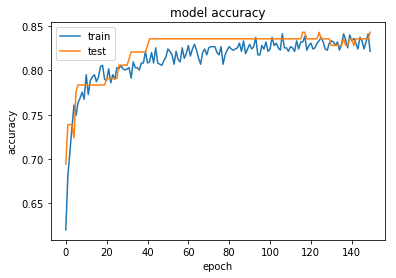

In [614]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

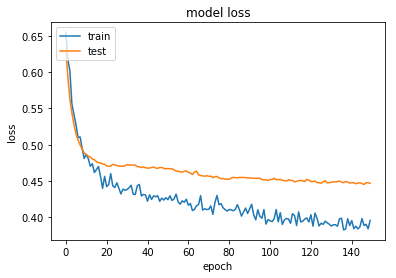

In [615]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [616]:
row_num = 0
testing_data = []
x_test = []
y_test = []

# import test data
with open('./data/test.csv', 'r') as test_data:
    for line in csv.reader(test_data, delimiter=','):
        if row_num > 0:
            testing_data.append(line)

        row_num += 1

test_data.close()

x_test, y_test = preprocess_data(testing_data, 1)
print(testing_data[0])

['988', '', '1', 'Cavendish, Mrs. Tyrell William (Julia Florence Siegel)', 'female', '76', '1', '0', '19877', '78.85', 'C46', 'S']


C:\MiniConda\envs\dlnd\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\MiniConda\envs\dlnd\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\MiniConda\envs\dlnd\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature o

In [617]:
preds = model.predict(x_test)

In [618]:
p_a = [int(round(pred[0])) for pred in preds]
print(p_a)

[1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 

In [619]:
submission_data = []

idx = 0

for prediction in p_a:
    submission_data.append([testing_data[idx][0], prediction])
    idx += 1

print(submission_data[10])

['1044', 0]


In [620]:
with open('./data/submission.csv', 'w', newline='') as submit_file:
    wr = csv.writer(submit_file, quoting=csv.QUOTE_ALL)
    wr.writerows(submission_data)